# Current profiles

Current velocities are calculated using the following power law, where
the default value of $\alpha$ is 1/7.

$$ u = \overline{u}(1 + \alpha) \left( \frac{d + z}{z} \right)^\alpha$$

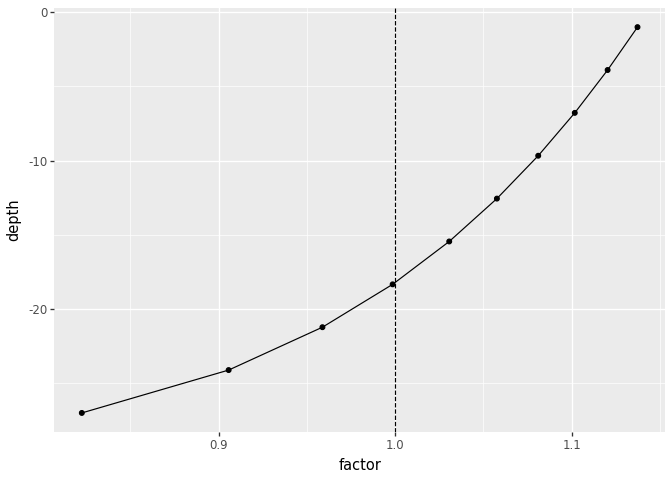

In [1]:
import numpy as np
import polars as pl
from plotnine import *

z = 30.0
depths = np.linspace(-27, -1, num=10)

alpha = 1.0/7
factor = (1.0 + alpha) * ((pl.col("depth") + z) / z).pow(alpha)

df = pl.DataFrame({"depth": depths}).with_columns(factor=factor)

(ggplot(df, aes(x="factor",y="depth"))
 + geom_point() + geom_line()
 + geom_vline(xintercept=1.0, linetype="dashed")
)